### INSURANCE PREMIUM PREDICTION

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


DATA Y SHOULD BE CHARGES

In [82]:
df2=pd.read_csv("https://raw.githubusercontent.com/Ranjit-Singh-786/insorance-Premium-Prediction/master/insurance.csv")
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [85]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [86]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [87]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [88]:
df["charges"].mean()

np.float64(13270.422265141257)

FIND OUT THE AVERAGE Charges of male and female

POPULATION DATA(ALL THE DATA) AND SAMPLE DATA(A PART OF POPULATION DATA)

In [89]:
male=df[df["sex"]=="male"]
female=df[df["sex"]=="female"]


In [90]:
male["charges"].mean()


np.float64(13956.751177721893)

In [91]:
female["charges"].mean()

np.float64(12569.578843835347)

In [92]:
df2=female[female["charges"]<=female["charges"].mean()]
df2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [93]:
df2["smoker"].value_counts()

smoker
no    441
Name: count, dtype: int64

In [94]:
df2["children"].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [95]:
df2["region"].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [96]:
ls=df["bmi"]
ls

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [97]:
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')

In [98]:
len(label)

1338

In [99]:
df["healthy_category"]=label

In [100]:
df

,age,sex,bmi,children,smoker,region,charges,healthy_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [101]:
df["healthy_category"].value_counts()

healthy_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [102]:
healthy_group=df.groupby("healthy_category")
healthy_group

In [103]:
healthy_group[["charges"]].min()

,charges
healthy_category,
HealthyWeight,1121.8739
Overweight,1252.4070
Underweight,1621.3402
obese,1131.5066


In [104]:
healthy_analysis=healthy_group['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')

In [105]:
healthy_analysis.sort_values('mean_charges')

,min_charges,max_charges,mean_charges
healthy_category,,,
Underweight,1621.3402,32734.18630,8852.200585
HealthyWeight,1121.8739,35069.37452,10404.900084
Overweight,1252.4070,38245.59327,11020.183782
obese,1131.5066,63770.42801,15420.399577


In [106]:
health_classes=list(healthy_analysis.index)

In [107]:
average_charges=(healthy_analysis["mean_charges"].values)


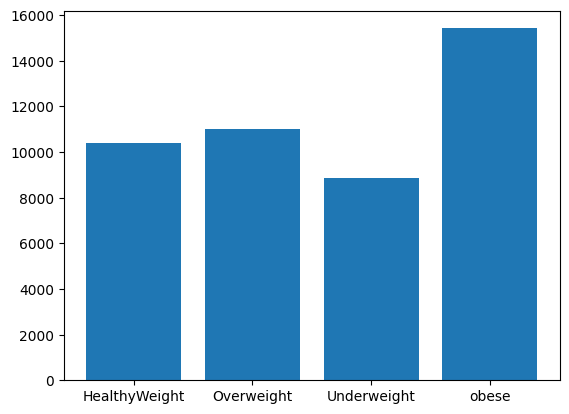

In [108]:
plt.bar(health_classes,average_charges)
plt.show()

In [109]:
average_charges1=(healthy_analysis["min_charges"].values)

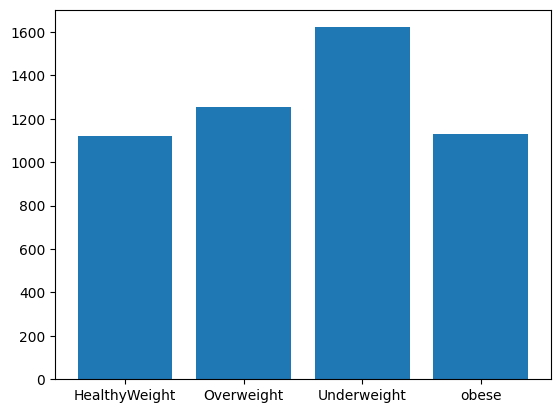

In [110]:
plt.bar(health_classes,average_charges1)
plt.show()

In [111]:
average_charges2=(healthy_analysis["max_charges"])

<BarContainer object of 4 artists>

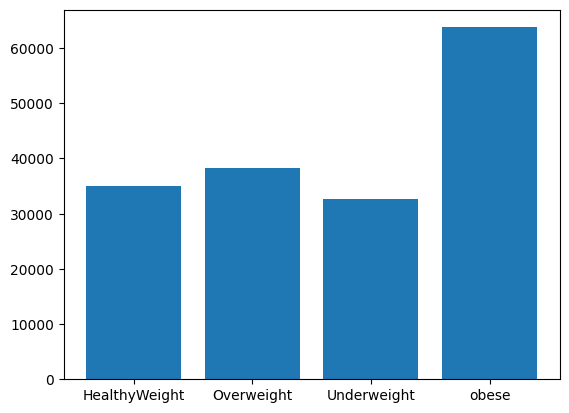

In [112]:
plt.bar(health_classes,average_charges2)

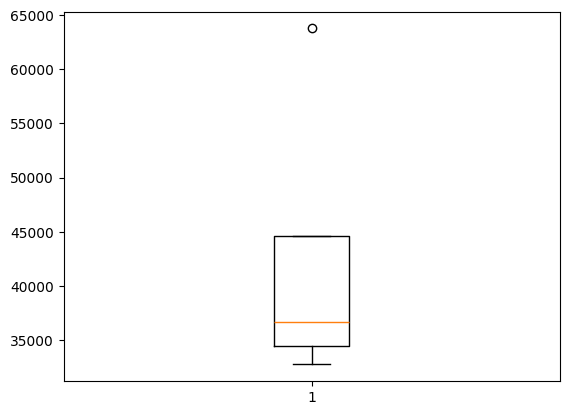

In [113]:
plt.boxplot(healthy_analysis["max_charges"])
plt.show()

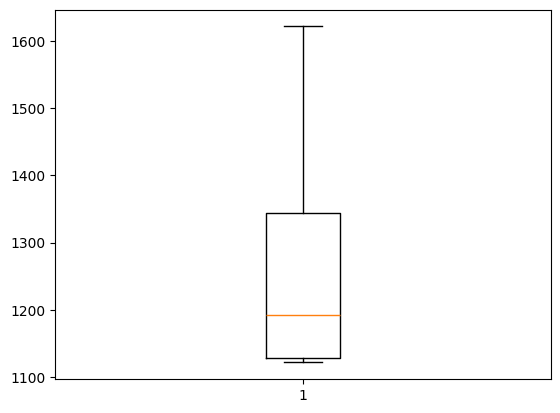

In [114]:
plt.boxplot(healthy_analysis["min_charges"])
plt.show()

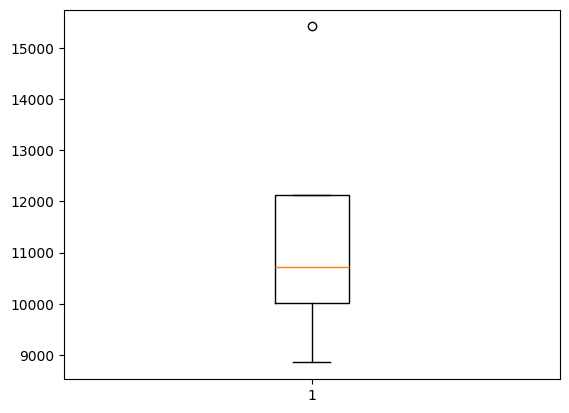

In [115]:
plt.boxplot(healthy_analysis["mean_charges"])
plt.show()

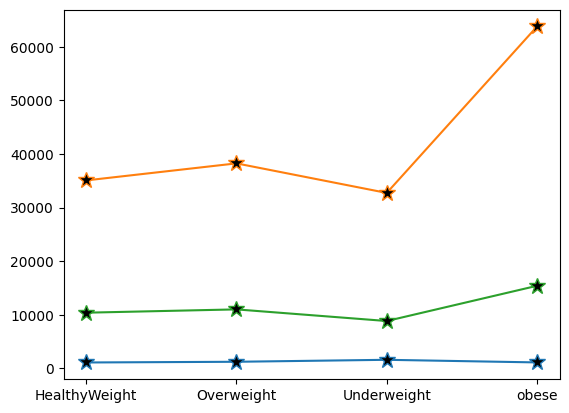

In [116]:
plt.plot(healthy_analysis,marker="*",ms=12,mfc="black")
plt.show()

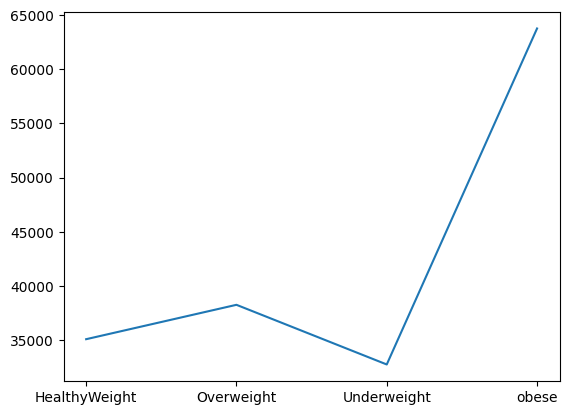

In [117]:
plt.plot(healthy_analysis["max_charges"])

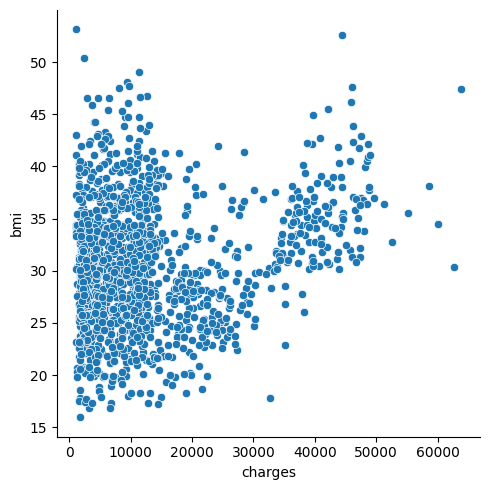

In [118]:
sns.relplot(x="charges",y="bmi",data=df)
plt.show()

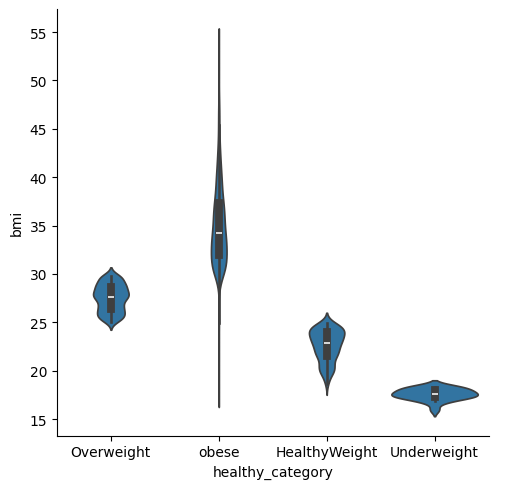

In [119]:
sns.catplot(x="healthy_category",y="bmi",data=df,kind="violin")
plt.show()

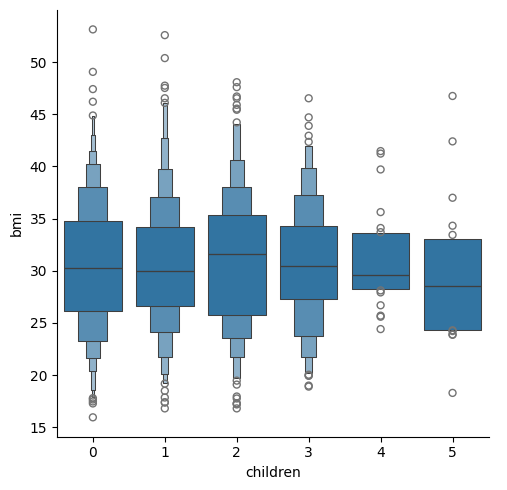

In [120]:
sns.catplot(x="children",y="bmi",data=df,kind="boxen")
plt.show()

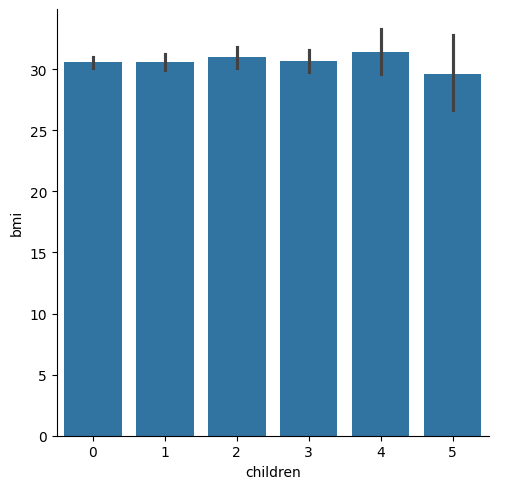

In [121]:
sns.catplot(x="children",y="bmi",data=df,kind="bar")
plt.show()

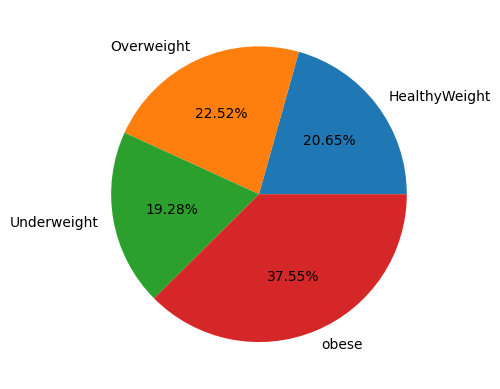

In [122]:
avg=list(healthy_analysis['max_charges'].values)
classes=list(healthy_analysis['max_charges'].index)
plt.pie(avg,labels=classes,autopct="%.2f%%")
plt.show()

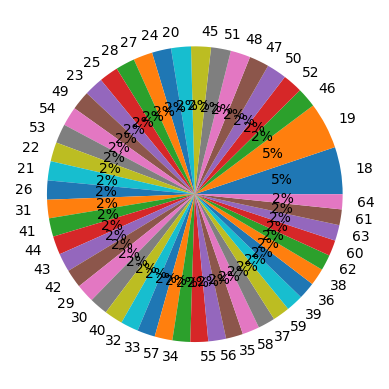

In [123]:
age1=list(df["age"].value_counts().values)
age2=list(df["age"].value_counts().index)
plt.pie(age1,labels=age2,autopct="%.f%%")
plt.show()

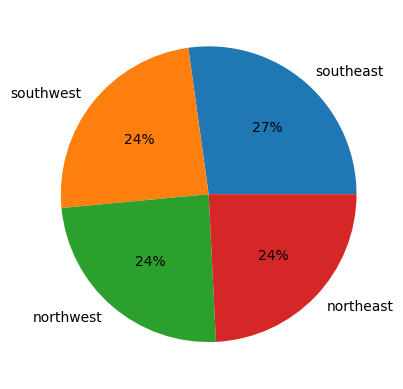

In [124]:
region1=list(df["region"].value_counts().values)
region2=list(df["region"].value_counts().index)
plt.pie(region1,labels=region2,autopct="%.f%%")
plt.show()

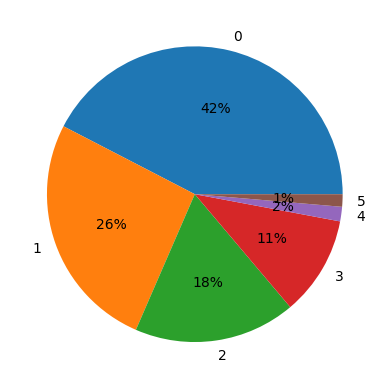

In [125]:
charges1=list(df2["children"].value_counts().values)
charges2=list(df2["children"].value_counts().index)
plt.pie(charges1,labels=charges2,autopct="%.f%%")
plt.show()

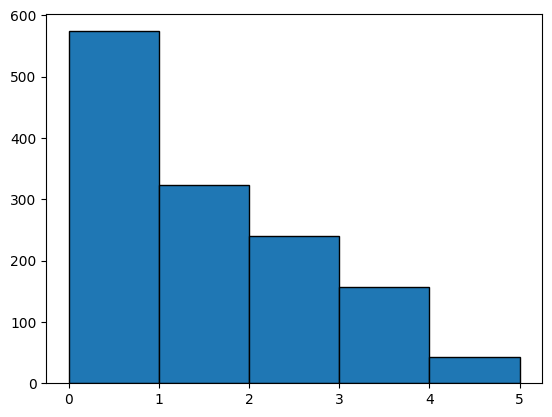

In [126]:
bin=[0,1,2,3,4,5]
plt.hist(df["children"],ec="k",bins=bin)
plt.show()

In [127]:
df.head()

,age,sex,bmi,children,smoker,region,charges,healthy_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


GENDER ==> ONEHOT ENCODE

In [128]:
gender_dict={"female":0,"male":1}
smoker_dict={"yes":1,"no":0}
df["sex"]=df["sex"].map(gender_dict)
df["smoker"]=df["smoker"].map(smoker_dict)

In [129]:
list(df.healthy_category.value_counts().keys())

['obese', 'Overweight', 'HealthyWeight', 'Underweight']

In [130]:
df.healthy_category.value_counts()

healthy_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

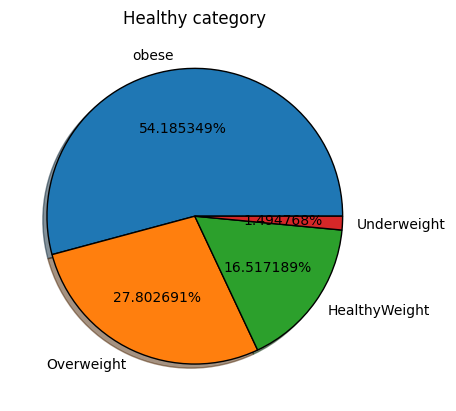

In [131]:
healthy1=list(df["healthy_category"].value_counts().values)
healthy2=list(df["healthy_category"].value_counts().index)
plt.pie(healthy1,labels=healthy2,autopct="%f%%",wedgeprops={"ec":"k"} ,shadow=True)
plt.title("Healthy category")
plt.show()

<BarContainer object of 4 artists>

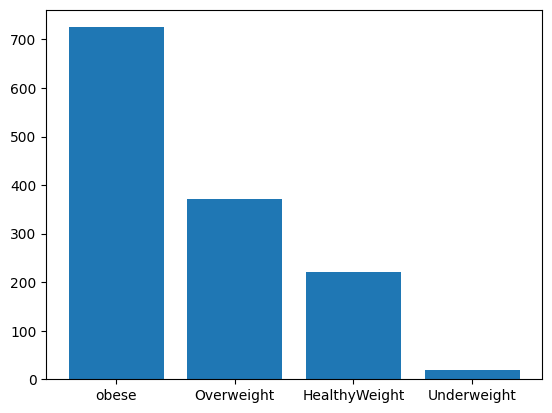

In [132]:
plt.bar(healthy2,healthy1)

In [133]:
df["healthy_category"].value_counts()

healthy_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [134]:
healthy_category_dict={"Underweight":1,"HealthyWeight":2,"Overweight":3,"obese":4}
df["healthy_category"]=df["healthy_category"].map(healthy_category_dict)

In [135]:
df.head()

,age,sex,bmi,children,smoker,region,charges,healthy_category
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [136]:
final_data=pd.get_dummies(df).astype(int)  #onehot encoding representation
final_data.head()

,age,sex,bmi,children,smoker,charges,healthy_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


In [137]:
final_data.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
healthy_category    0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [138]:
x=final_data.drop('charges', axis="columns")
y=final_data["charges"]

In [139]:
# train test split
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [141]:
# REGRESSION
# 1 linearregression
# 2 DecisionTree
# RandomForest

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


In [143]:
# object creation
# Hyper parameter tunning ---> to obtain highest accuracy
lnr=LinearRegression()
dtr=DecisionTreeRegressor()
rdmfr=RandomForestRegressor()
# default parameter

In [144]:
# class Linar:
#     def __init__(self,a=10,b=20):
#         pass

In [145]:
# model train
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdmfr.fit(x_train,y_train)
print("You have train all the algorithms")

You have train all the algorithms


In [146]:
print("Training score by linear:",lnr.score(x_train,y_train)*100)
print("Training score by DecisionTree:",dtr.score(x_train,y_train)*100)
print("Training score by RandomForest:",rdmfr.score(x_train,y_train)*100)
print()

print("Testing score by linear:",lnr.score(x_test,y_test)*100)
print("Testing score by DecisionTree:",dtr.score(x_test,y_test)*100)
print("Testing score by RandomForest:",rdmfr.score(x_test,y_test)*100)

Training score by linear: 74.942687181989
Training score by DecisionTree: 99.76965330068543
Training score by RandomForest: 97.35389731732847

Testing score by linear: 76.83759061979733
Testing score by DecisionTree: 76.64702879400093
Testing score by RandomForest: 87.37189872815075


In [147]:
# RandomForest prediction
prediction_linear=lnr.predict(x_test)
prediction_DecisionTree=dtr.predict(x_test)
prediction_RandomForest=rdmfr.predict(x_test)

In [148]:
comparison_df=pd.concat([x_test,y_test],axis=1)
comparison_df

,age,sex,bmi,children,smoker,healthy_category,region_northeast,region_northwest,region_southeast,region_southwest,charges
1018,54,0,35,3,0,4,0,1,0,0,12495
643,23,0,34,3,0,4,0,1,0,0,4466
515,58,1,35,0,0,4,0,0,0,1,11362
896,43,0,20,2,1,2,1,0,0,0,19798
193,56,0,26,1,0,3,0,1,0,0,12044
...,...,...,...,...,...,...,...,...,...,...,...
1262,41,0,28,1,0,3,0,0,1,0,6770
472,19,0,29,0,0,3,0,0,0,1,1744
1244,18,1,33,0,0,4,0,0,1,0,1135
656,26,0,42,1,0,4,0,0,0,1,3410


In [149]:
comparison_df["linear_prediction"]=prediction_linear
comparison_df["Decision_prediction"]=prediction_DecisionTree
comparison_df["RandomForest_prediction"]=prediction_RandomForest
comparison_df


,age,sex,bmi,children,smoker,healthy_category,region_northeast,region_northwest,region_southeast,region_southwest,charges,linear_prediction,Decision_prediction,RandomForest_prediction
1018,54,0,35,3,0,4,0,1,0,0,12495,15101.369024,26467.0,17214.07
643,23,0,34,3,0,4,0,1,0,0,4466,7275.969097,3500.0,6521.01
515,58,1,35,0,0,4,0,0,0,1,11362,13750.353678,11743.0,11721.31
896,43,0,20,2,1,2,1,0,0,0,19798,30933.175980,18767.0,20425.46
193,56,0,26,1,0,3,0,1,0,0,12044,11626.139686,25517.0,19270.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,41,0,28,1,0,3,0,0,1,0,6770,7779.330662,6500.0,6728.45
472,19,0,29,0,0,3,0,0,0,1,1744,1934.589403,1256.0,2979.94
1244,18,1,33,0,0,4,0,0,1,0,1135,3619.521665,1136.0,2482.19
656,26,0,42,1,0,4,0,0,0,1,3410,7810.192166,3577.0,3580.45


In [150]:
comparison_df.to_csv("prediction_csv",index=False)

 TO IMPROVE THE PERFORMANCE OF MODEL OR ALGORITHM
 CHANGE YOUR DATA PRE_PROCESSING
 GET SUFFICIENT AMOUNT OF DATA
 LINEAR, DECISIONtREE,RANDOMFOREST ->CHANGE YOUR ALGORITHM
 DEFAULT PARAMETER->HYPERPARAMETER TUNING
 GENERATION 
 ACCURACY INCREASED

In [151]:
import joblib,os

In [153]:
# Saving the models
os.makedirs("models",exist_ok=True)
joblib.dump(lnr,"./models/linear_model.lb")
joblib.dump(dtr,"./models/decisiontree.lb")
joblib.dump(rdmfr,"./models/randomforest.lb")

['./models/randomforest.lb']

In [154]:
df


,age,sex,bmi,children,smoker,region,charges,healthy_category
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,4
1334,18,0,31.920,0,0,northeast,2205.98080,4
1335,18,0,36.850,0,0,southeast,1629.83350,4
1336,21,0,25.800,0,0,southwest,2007.94500,3
